In [2]:
import numpy as np
import pandas as pd
import yfinance as yf

In [3]:
BTC=yf.download(tickers="BTC-USD", start="2017-01-01",interval="1mo")

[*********************100%***********************]  1 of 1 completed


In [4]:
BTC

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-01,963.658020,1191.099976,755.755981,970.403015,970.403015,5143971692
2017-02-01,970.940979,1200.390015,946.690979,1179.969971,1179.969971,4282761200
2017-03-01,1180.040039,1280.310059,903.713013,1071.790039,1071.790039,10872455960
2017-04-01,1071.709961,1347.910034,1061.089966,1347.890015,1347.890015,9757448112
2017-05-01,1348.300049,2763.709961,1348.300049,2286.409912,2286.409912,34261856864
...,...,...,...,...,...,...
2023-04-01,28473.332031,31005.607422,27070.849609,29268.806641,29268.806641,511540319004
2023-05-01,29227.103516,29820.126953,25878.429688,27219.658203,27219.658203,443473015479
2023-06-01,27218.412109,31389.539062,24797.167969,30477.251953,30477.251953,481734214225


In [5]:
BTC.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-01,28473.332031,31005.607422,27070.849609,29268.806641,29268.806641,511540319004
2023-05-01,29227.103516,29820.126953,25878.429688,27219.658203,27219.658203,443473015479
2023-06-01,27218.412109,31389.539062,24797.167969,30477.251953,30477.251953,481734214225
2023-07-01,30471.847656,31814.515625,28934.294922,29230.111328,29230.111328,382224489090
2023-08-01,29230.873047,30176.796875,28657.023438,29202.435547,29202.435547,200932079359


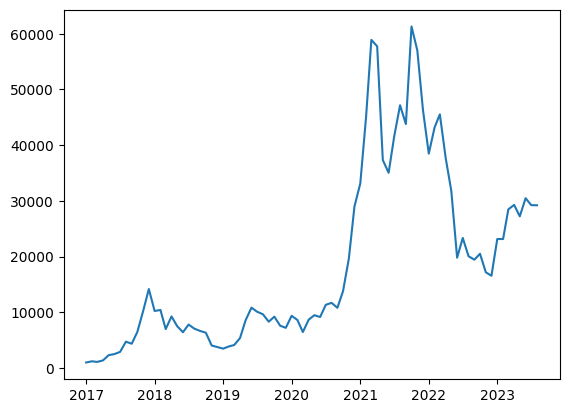

In [6]:
import matplotlib
from matplotlib.pyplot import*
plot(BTC["Adj Close"])
show()

In [7]:
BTC.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 80 entries, 2017-01-01 to 2023-08-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       80 non-null     float64
 1   High       80 non-null     float64
 2   Low        80 non-null     float64
 3   Close      80 non-null     float64
 4   Adj Close  80 non-null     float64
 5   Volume     80 non-null     int64  
dtypes: float64(5), int64(1)
memory usage: 4.4 KB


In [8]:
BTC.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Promedio y desviación estandar del volumen



In [9]:
mean_of_volume=BTC["Volume"].mean()
mean_of_volume="{:,}".format(mean_of_volume)
std_of_volume = BTC["Volume"].std()
std_of_volume="{:,}".format(std_of_volume)

print("The mean for the volume for BTC is equivalent to: ", mean_of_volume)
print("The standard deviation for the volume for BTC is equivalent to: ", std_of_volume)

The mean for the volume for BTC is equivalent to:  672,011,802,365.0375
The standard deviation for the volume for BTC is equivalent to:  523,080,386,014.4694


Histograma de volumen

<Axes: >

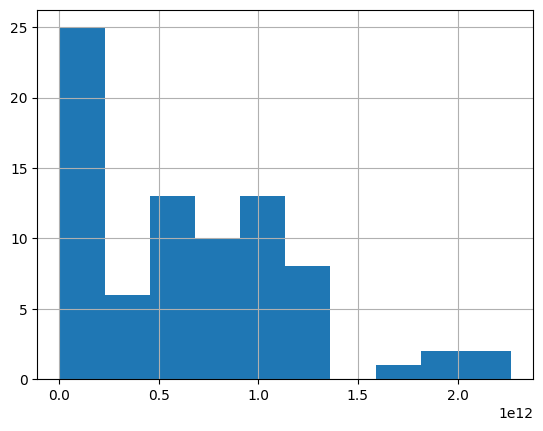

In [10]:
BTC["Volume"].hist()

In [11]:
BTC["R"] = (BTC["Adj Close"] / BTC["Adj Close"].shift(1)) - 1
print(BTC["R"])

Date
2017-01-01         NaN
2017-02-01    0.215959
2017-03-01   -0.091680
2017-04-01    0.257606
2017-05-01    0.696288
                ...   
2023-04-01    0.027752
2023-05-01   -0.070011
2023-06-01    0.119678
2023-07-01   -0.040920
2023-08-01   -0.000947
Name: R, Length: 80, dtype: float64


In [12]:
BTC["r"] = np.log(BTC['Adj Close']) - np.log(BTC['Adj Close'].shift(1))
# Another way to do the same as above is appying the diff method to the log:  
BTC["r2"] = np.log(BTC['Adj Close']).diff(1)

# We can see that r and r2 are the same: 
print(BTC.tail())

# I keep a new object with only returns:
BTCR = BTC[['R','r']].copy()

                    Open          High           Low         Close  \
Date                                                                 
2023-04-01  28473.332031  31005.607422  27070.849609  29268.806641   
2023-05-01  29227.103516  29820.126953  25878.429688  27219.658203   
2023-06-01  27218.412109  31389.539062  24797.167969  30477.251953   
2023-07-01  30471.847656  31814.515625  28934.294922  29230.111328   
2023-08-01  29230.873047  30176.796875  28657.023438  29202.435547   

               Adj Close        Volume         R         r        r2  
Date                                                                  
2023-04-01  29268.806641  511540319004  0.027752  0.027373  0.027373  
2023-05-01  27219.658203  443473015479 -0.070011 -0.072583 -0.072583  
2023-06-01  30477.251953  481734214225  0.119678  0.113041  0.113041  
2023-07-01  29230.111328  382224489090 -0.040920 -0.041781 -0.041781  
2023-08-01  29202.435547  200932079359 -0.000947 -0.000947 -0.000947  


In [13]:
BTCR= BTCR.dropna()

In [14]:
sumret = BTC["R"].describe()
sumret

count    79.000000
mean      0.070424
std       0.242309
min      -0.377688
25%      -0.077135
50%       0.017298
75%       0.234738
max       0.696288
Name: R, dtype: float64

In [15]:
BTCR[BTCR["R"]<-0.15]

,R,r
Date,,
2018-01-01,-0.277987,-0.325713
2018-03-01,-0.329333,-0.399482
2018-05-01,-0.188991,-0.209476
2018-11-01,-0.364116,-0.452739
2019-11-01,-0.177177,-0.195014
2020-03-01,-0.251278,-0.289387
2021-05-01,-0.353546,-0.436253
2021-12-01,-0.187684,-0.207865
2022-01-01,-0.168947,-0.185061


In [16]:
BTCR[BTCR["R"]>0.15].sort_values(by=['R'], ascending=False)

,R,r
Date,,
2017-05-01,0.696288,0.528442
2017-08-01,0.635768,0.492113
2019-05-01,0.602493,0.471561
2017-11-01,0.582091,0.458748
2017-10-01,0.490858,0.399352
2020-12-01,0.477732,0.390508
2020-11-01,0.424123,0.353556
2021-10-01,0.400267,0.336663
2023-01-01,0.398356,0.335297


In [17]:
print("The monthly average cc return of Bitcoin is ", BTCR["r"].mean())
print("The monthly variance of Bitcoin cc return is ", BTCR["r"].var())
print("The monthly standard deviation (volatility) of Bitcoin cc return is ", BTCR["r"].std())
print("The monthly median cc return of Bitcoin is ",BTCR["r"].median())

The monthly average cc return of Bitcoin is  0.043092353533993384
The monthly variance of Bitcoin cc return is  0.05069174238382503
The monthly standard deviation (volatility) of Bitcoin cc return is  0.22514826755679251
The monthly median cc return of Bitcoin is  0.01714972738881393


#### 3.2 Challenge Histogram

In [18]:
BTC=yf.download(tickers="BTC-USD", start="2017-01-01",interval="1d")
# I calculate simple and cc return columns:
BTC["R"] = (BTC["Adj Close"] / BTC["Adj Close"].shift(1)) - 1
BTC["r"] = np.log(BTC['Adj Close']).diff(1)
# I keep a new object with only returns:
BTCR = BTC[['R','r']].copy()

[*********************100%***********************]  1 of 1 completed


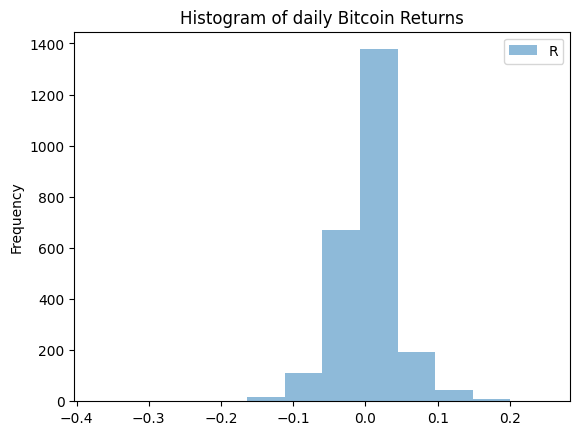

In [19]:
R_bitcoin = pd.DataFrame(BTCR[["R"]])
hist=R_bitcoin.plot.hist(bins=12,alpha=0.5,title="Histogram of daily Bitcoin Returns")

Interpret the histogram with your own words and in CAPITAL LETTERS

*   GIVING A FAST GLIMPSE TO THE HISTOGRAM I CAN ALSO SEE THAT THERE IS A SLIGHT POSITIVE SKEWNESS WHICH COULD BE INTERPRETED THAT THERE MIGHT BE A TENDENCY FOR DAYS WITH SMALL GAINS.
*   ONE CAN ALSO OBSERVE THAT THE HISTOGRAM SHOWS SOME INTRESTING OUTLIERS SUCH AS DATA IN THE -0.4 RETURN AND THE 0.2 RETURN. IN THIS CASE SHOWING THAT THERE WERE DAYS WITH A NEGATIVE RETURN (40 PERCENT) AND WITH VERY HIGH RETURN (AROUND 20 PERCENT)
*   THE Y-AXIS REPRESENTS THE FREQUENCY OF OCCURRENCES FOR EACH RANGE OF RETURNS. A HIGHER BAR INDICATES THAT MORE INSTANCES FALL WITHIN THAT RANGE. WHICH MEANS THAT IN THIS HISTOGRAM THE HIGHEST INSTANCES LIE WITHIN, APPROXIMATELY, THE -0.18 AND THE 0.20 RANGE. 

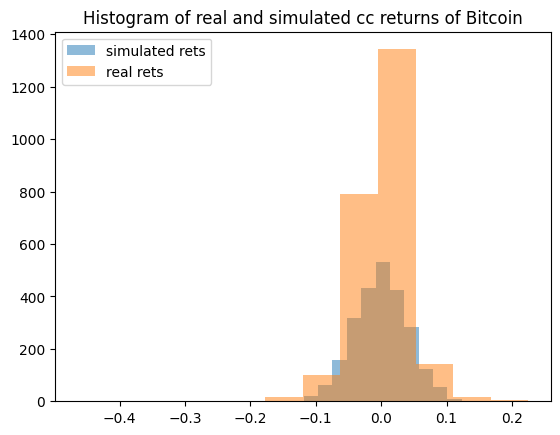

In [20]:
from matplotlib import pyplot
pyplot.clf()
rmean = BTCR["r"].mean()
rsd = BTCR["r"].std()
N = BTCR["r"].count()
simr= np.random.normal(loc=rmean,scale=rsd, size=N)
realr = BTCR["r"].to_numpy()

bins = 12

pyplot.hist(simr,bins,alpha=0.5,label='simulated rets')
pyplot.hist(realr,bins,alpha=0.5,label='real rets')
pyplot.legend(loc='upper left')
pyplot.title(label='Histogram of real and simulated cc returns of Bitcoin')

pyplot.show()

DO YOU SEE A DIFFERENCE BEWEEN THE REAL VS THE SIMULATED RETURNS? BRIEFLY EXPLAIN.

*  IN TERMS OF FREQUENCY, THERE IS A HUGE DIFFERENCE, WITH REAL RETURNS HAVING A HIGHER FREQUENCY.
*  THE RETURNS INVESTED IN BITCOIN ARE RISKY AND TEND TO HAVE MORE EXTREME VALUES (BOTH FOR LOSSES AND GAINS). WE CAN ALSO OBSERVE THAT THE BEHAVIOUR OF THE REAL RETURNS DOES NOT CONFORM TO A NORMAL DISTRIBUTION.
*  THERE IS ALSO A FAT TAIL BEHAVIOUR IN THE REAL RETURNS OF BITCOIN. THE TAILS OF THE HISTOGRAM EXTEND FURTHER OUT FROM THE CENTRAL PART OF THE DISTRIBUTION, INDICATING THAT RARE AND EXTREME EVENTS OCCUR MORE FREQUENTLY THAN THEY WOULD IN A TYPICAL BELL-SHAPED CURVE. 
*  THIS MEANS THAT “ODD DAYS” OCCUR MORE OFTEN COMPARED TO THE SIMULATED RETURNS. THIS ALSO SIGNALS TO HAVING A HIGHER FREQUENCY OF EXTREME VALUES WHICH ONLY DEMONSTRATES THAT THE INVESTMENT IN BITCOINS IS TOO RISKY AND VOLATILE TO BE YOUR ONLY OPTION FOR INVESTMENTS